In [10]:
% matplotlib inline

from __future__ import division

import numpy as np 
import pandas as pd 

import tweepy
from nltk.tokenize import TweetTokenizer

import re
from collections import Counter
from nltk.tokenize import TweetTokenizer

import json
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
! ls
%cd '/content/drive/My Drive/Colab Notebooks/Summer 2020/Project-X/'
! ls

drive  sample_data
/content/drive/My Drive/Colab Notebooks/Summer 2020/Project-X
data-pull.ipynb				     README.md
Data_Utilities.py			     relevant-tweets-buckets.ipynb
initial-analysis.ipynb			     relevant-tweets-optimization.ipynb
LM.ipynb				     Research
ProjectX_Sentiment_Analysis_GoogleAPI.ipynb  Tweets
__pycache__				     twitter_credentials.json


In [4]:
def tweets_call(twitter_handle):

    with open('twitter_credentials.json') as cred_data:
            info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    try:
      tweets = get_tweets(twitter_handle)
      most_recent_tweet = tweets.iloc[0][0] + 1
      tweets_bunch = 'init'
      new_tweets = []

      while len(tweets_bunch) > 0:
        tweets_bunch = api.user_timeline(screen_name = twitter_handle, count = 200, since_id = most_recent_tweet, tweet_mode = "extended")
        new_tweets.extend(tweets_bunch)
        new_num = len(new_tweets)
        print ('...{a} tweets have been downloaded for {b}'.format(a = new_num, b = twitter_handle))
        try: 
          most_recent_tweet = new_tweets[0].id + 1
        except IndexError:
          return
        
      outtweets = [[tweet.id, tweet.created_at, tweet.full_text] for tweet in new_tweets]
      df = pd.concat([pd.DataFrame(outtweets, columns=['id', 'created_at', 'text']), tweets], ignore_index=True)

    except FileNotFoundError:
      new_tweets = api.user_timeline(screen_name = twitter_handle, count = 200, tweet_mode = "extended")
      new_num = len(new_tweets)
      print ('...{a} tweets have been downloaded for {b}'.format(a = new_num, b = twitter_handle))
      outtweets = [[tweet.id_str, tweet.created_at, tweet.full_text] for tweet in new_tweets]
      df = pd.DataFrame(outtweets, columns=['id', 'created_at', 'text'])

    df.to_csv('Tweets/' + twitter_handle + '_tweets.csv', index=False, encoding = 'utf8')
            
def get_tweets(twitter_handle):
    tweet_data = pd.read_csv('Tweets/' + twitter_handle + '_tweets.csv', encoding = 'utf-8')
    tweet_data = tweet_data.dropna()
    return tweet_data

def get_old_tweets(twitter_handle, n=200):

    with open('twitter_credentials.json') as cred_data:
            info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    try:
      tweets = get_tweets(twitter_handle)
      first_tweet = tweets.iloc[-1][0] - 1
      new_tweets = []
      num = 0

      while num <= n:
        tweets_bunch = api.user_timeline(screen_name = twitter_handle, count = n - num, max_id = first_tweet, tweet_mode = "extended")
        new_tweets.extend(tweets_bunch)
        new_num = len(new_tweets)
        print ('...{a} tweets have been downloaded for {b}'.format(a = new_num, b = twitter_handle))
        try: 
          first_tweet = new_tweets[-1].id + 1
        except IndexError:
          return
        num += new_num
        
      outtweets = [[tweet.id, tweet.created_at, tweet.full_text] for tweet in new_tweets]
      df = pd.concat([tweets, pd.DataFrame(outtweets, columns=['id', 'created_at', 'text'])], ignore_index=True)
      df.to_csv('Tweets/' + twitter_handle + '_tweets.csv', index=False, encoding = 'utf8')

    except FileNotFoundError:
        tweets_call(twitter_handle)


# tweets = get_tweets('SenBooker')

In [5]:
reps = ["ChuckGrassley", "jaredpolis", "clairecmc", "GovChristie", "jahimes", "MayorMark", "GovGaryJohnson", "RepSteveIsrael", "SteveWorks4You", "JerryBrownGov", "PeterRoskam", "RepCohen", 
               "AndrewYang", "BenSasse", "BernieSanders", "BorisJohnson", "CoryBooker", "JeffFlake", "JoeBiden", "KamalaHarris", "MittRomney", "PeteButtigieg", "SenBooker", "SenKamalaHarris", 
               "SenSanders", "SenTedCruz", "SenWarren", "SenatorRomney", "TedCruz", "ewarren", "mcuban", "mike_pence", "realDonaldTrump"]

In [7]:
for rep in reps:
  # tweets_call(rep)
  get_old_tweets(rep, 200)

...200 tweets have been downloaded for ChuckGrassley
...220 tweets have been downloaded for ChuckGrassley
...200 tweets have been downloaded for jaredpolis
...220 tweets have been downloaded for jaredpolis
...200 tweets have been downloaded for clairecmc
...220 tweets have been downloaded for clairecmc
...199 tweets have been downloaded for GovChristie
...200 tweets have been downloaded for GovChristie
...200 tweets have been downloaded for jahimes
...220 tweets have been downloaded for jahimes
...198 tweets have been downloaded for MayorMark
...200 tweets have been downloaded for MayorMark
...200 tweets have been downloaded for GovGaryJohnson
...220 tweets have been downloaded for GovGaryJohnson
...200 tweets have been downloaded for RepSteveIsrael
...220 tweets have been downloaded for RepSteveIsrael
...185 tweets have been downloaded for SteveWorks4You
...199 tweets have been downloaded for SteveWorks4You
...200 tweets have been downloaded for JerryBrownGov
...220 tweets have been d

Downloaded tweets till here. Building Language Model now.

In [11]:
from fastai.text import *

data_path = Path('Tweets')
model_path = Path(os.getcwd())
bs = 48

In [12]:
train_df = pd.DataFrame()
for rep in reps:
  rep_df = get_tweets(rep)
  rep_df['rep'] = [rep]*len(rep_df)
  train_df = pd.concat([rep_df, train_df], ignore_index=True)

In [49]:
train_df.text[3]

' @TeamTrump: Mail-In Ballots will lead to MASSIVE electoral fraud and a RIGGED 2020 Election.\n\nWe cannot let it happen! '

In [23]:
train_df.text = train_df.text.apply(lambda x: re.sub(u'(https?:)\/\/\S*', u'', x))    # Removing 'https://'
train_df.text = train_df.text.apply(lambda x: re.sub(u'RT', u'', x))                  # Changing 'RT' to ''
train_df.text = train_df.text.apply(lambda x: re.sub(u'\&amp\;', u'and', x))          # Changing '&amp;' to 'and'

Need to find a way to mark a tweet as a RT or remove the RT altogether since the RT may not necessarily be a reflection of the tweeter's opinion but could also be a critique which not be correctly reflected.

In [30]:
# data_lm = (TextList.from_df(path = data_path, df = train_df, cols = 2)
#             .split_by_rand_pct(0.1)
#             .label_for_lm()           
#             .databunch(bs=bs))
# data_lm.save('data_lm.pk1')
data_lm = load_data(data_path, 'data_lm.pkl')

In [53]:
data_lm.show_batch()

idx,text
0,"xxmaj immigration , xxmaj drugs and xxmaj crime . xxbos xxup icymi : “ xxmaj jeff xxmaj sessions to federal prosecutors : i do n’t trust you ” xxbos @cbsnews : xxup watch xxup live : xxmaj sen. xxmaj bernie xxmaj sanders to unveil his “ xxmaj medicare for all ” health care plan xxbos @marklevinshow : xxmaj sen. xxmaj mike xxmaj lee exposes xxmaj democrat xxmaj party ."
1,make xxmaj america xxmaj great xxmaj again # xxmaj debates2016 # xxup maga xxbos xxmaj xxunk the xxup gop believe the single most important issue facing our nation is to let employers deny women access to birth control coverage . xxbos xxup democrat xxup congressional xxup hearings xxup are # xxup rigged ! xxbos xxmaj great win by xxunk yesterday . # xxunk xxbos @sarahksilverman : xxmaj it ’s because
2,"un xxmaj human xxmaj rights xxmaj council should turn its focus to the serious human rights violations happening in xxmaj china , xxmaj venezuela , and xxmaj cuba – its members ' own countries – instead of pushing anti - xxmaj american policies . xxbos xxmaj in 1981 , i won my first election to become xxmaj mayor of xxmaj burlington by 10 votes . xxmaj please remember that every"
3,"\n xxbos xxmaj conservative leaders like xxunk will get this country back on track . xxmaj missouri , vote for xxmaj roy on xxmaj nov. 8th # xxup xxunk xxbos @itsmepv xxmaj what ! ! ? ? xxmaj you ca n't leave . xxbos xxmaj would be glad to go on xxup msnbc or any other network too . xxmaj enjoyed xxup cnn and xxmaj business xxmaj insider ."
4,"deserve safety , dignity , and a voice on the job . xxmaj during a xxunk … xxbos xxunk @sbagov xxmaj the goal was to keep people on the payrolls . xxmaj if funded immediately , it might have . xxmaj but the delay led to layoffs , which along with xxmaj stay xxmaj at xxmaj home led to a collapse in consumer demand and 36 m unemployed . xxmaj"


## Language Model Training on Twitter Data

In [36]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 1.74E-02


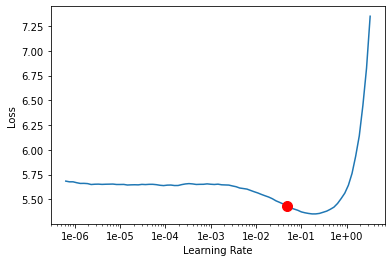

In [37]:
learn_lm.lr_find()
learn_lm.recorder.plot(suggestion=True)
min_grad_lr = learn_lm.recorder.min_grad_lr

In [38]:
learn_lm.fit_one_cycle(1, slice(1e-2,1e-1), moms=(0.8,0.7))
learn_lm.save('learn_lm_v1')

epoch,train_loss,valid_loss,accuracy,time
0,4.358604,4.096649,0.295712,01:59


In [39]:
learn_lm.freeze_to(-2)
learn_lm.fit_one_cycle(1, slice(1e-3,1e-1), moms=(0.8,0.7))
learn_lm.save('learn_lm_v2')

epoch,train_loss,valid_loss,accuracy,time
0,4.008318,3.848891,0.319551,02:04


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


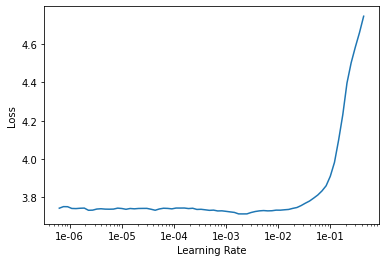

In [40]:
learn_lm.unfreeze()
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end=15)

In [41]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(5, slice(1e-4,1e-3), moms=(0.8,0.7))
learn_lm.save('learn_lm_v3')

epoch,train_loss,valid_loss,accuracy,time
0,3.678654,3.806829,0.324958,02:26
1,3.611075,3.736622,0.333447,02:26
2,3.513739,3.697960,0.338787,02:26
3,3.427234,3.685868,0.340904,02:27
4,3.406071,3.687043,0.340996,02:27


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


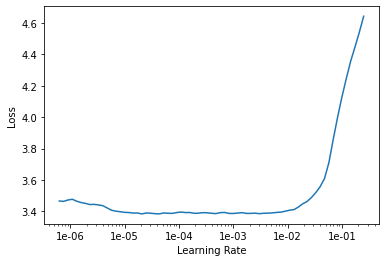

In [42]:
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end=15)

In [43]:
learn_lm.save('learn_lm_final')

In [46]:
TEXT = "Food should be accessible"
N_WORDS = 40
N_SENTENCES = 2

In [47]:
print("\n".join(learn_lm.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Food should be accessible for the American people , but EQUAL TREATMENT ARE IN JAIL AND THAT HELPS TO THE EVERY WAY xxbos In this country , our government
Food should be accessible away from the right and left . We can do more to reduce the prices on people who are struggling . 
 
  Watch live now : xxbos The Senate Judiciary Committee just voted to


In [50]:
learn_lm.save('learn_lm_final')
learn_lm.save_encoder('fine_tuned_enc')

## Classification of Tweets by Rep to extract Rep-Embedding

Trying to classify tweets into 

In [54]:
from collections import Counter

Counter(train_df.rep)

Counter({'AndrewYang': 3537,
         'BenSasse': 3227,
         'BernieSanders': 3447,
         'BorisJohnson': 2068,
         'ChuckGrassley': 1229,
         'CoryBooker': 3421,
         'GovChristie': 1202,
         'GovGaryJohnson': 1221,
         'JeffFlake': 2866,
         'JerryBrownGov': 1214,
         'JoeBiden': 2115,
         'KamalaHarris': 3444,
         'MayorMark': 1215,
         'MittRomney': 1927,
         'PeteButtigieg': 3446,
         'PeterRoskam': 1220,
         'RepCohen': 1210,
         'RepSteveIsrael': 1222,
         'SenBooker': 3425,
         'SenKamalaHarris': 3438,
         'SenSanders': 3453,
         'SenTedCruz': 3463,
         'SenWarren': 3433,
         'SenatorRomney': 498,
         'SteveWorks4You': 1116,
         'TedCruz': 3516,
         'clairecmc': 1264,
         'ewarren': 1244,
         'jahimes': 1220,
         'jaredpolis': 1230,
         'mcuban': 1248,
         'mike_pence': 3490,
         'realDonaldTrump': 1335})

In [55]:
reps_for_clas = ["BernieSanders", "JoeBiden", "MittRomney", "SenKamalaHarris", "SenTedCruz", "SenWarren", "SenatorRomney", "mcuban", "mike_pence", "realDonaldTrump"]
df_clas = train_df.loc[train_df.rep.apply(lambda rep: rep in reps_for_clas)]

In [56]:
df_clas

,id,created_at,text,rep
0,1279649292966395904,2020-07-05 05:32:20,Wow. @CNN got caught cold manipulating the wor...,realDonaldTrump
1,1279623260490039298,2020-07-05 03:48:54,"On this wonderful day, we celebrate our histor...",realDonaldTrump
2,1279621608521547776,2020-07-05 03:42:20,,realDonaldTrump
3,1279611869515440129,2020-07-05 03:03:38,@TeamTrump: Mail-In Ballots will lead to MASS...,realDonaldTrump
4,1279545900138991617,2020-07-04 22:41:30,@WhiteHouse: LIVE: Salute to America!,realDonaldTrump
...,...,...,...,...
51272,835209701457526784,2017-02-24 19:28:04,Now is the time for the American people to dem...,BernieSanders
51273,835172577345699840,2017-02-24 17:00:33,I believe you are entitled to justice and to e...,BernieSanders
51274,834818062339756032,2017-02-23 17:31:50,@MoveOn: .@SenSanders wants you to join him o...,BernieSanders
51275,834807788828233729,2017-02-23 16:51:01,One of the great and ongoing struggles of huma...,BernieSanders


In [57]:
data_lm.vocab.itos

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.',
 'the',
 'to',
 ',',
 'and',
 'of',
 ':',
 'a',
 'in',
 'for',
 '#',
 'is',
 'we',
 'i',
 'on',
 'that',
 'this',
 'it',
 'our',
 '…',
 '-',
 '’s',
 'you',
 '!',
 'with',
 'are',
 'be',
 "'s",
 'at',
 'have',
 '\n \n ',
 'will',
 'not',
 'from',
 '"',
 '\n ',
 'my',
 'today',
 'as',
 'all',
 'people',
 'who',
 'by',
 'they',
 'their',
 'do',
 'about',
 'has',
 'more',
 'an',
 '?',
 'can',
 'trump',
 'he',
 'us',
 'was',
 'but',
 'his',
 'your',
 'n’t',
 'up',
 '—',
 'what',
 '“',
 'president',
 'if',
 'now',
 'out',
 'must',
 'should',
 '/',
 'need',
 'no',
 'great',
 'new',
 'just',
 'time',
 'one',
 'country',
 'so',
 'health',
 '”',
 'make',
 'would',
 'or',
 'get',
 "n't",
 'care',
 'bill',
 'day',
 'when',
 'thank',
 'american',
 'americans',
 'there',
 '$',
 'me',
 'here',
 'work',
 'america',
 'right',
 'than',
 'like',
 'how',
 'senate',
 'been',
 'act',
 'vote',
 'support',
 'over',

In [59]:
# data_clas = (TextList.from_df(path = data_path, df = df_clas, cols = 2, vocab=data_lm.vocab)
#             .split_by_rand_pct(0.1)
#             .label_from_df(cols=3)           
#             .databunch(bs=bs))
# data_clas.save('data_clas.pkl')
data_clas = load_data(data_path, 'data_clas.pkl', bs=16)

In [60]:
data_clas.show_batch()

text,target
xxbos xxmaj george xxmaj floyd \n xxmaj ahmaud xxmaj arbery \n xxmaj breonna xxmaj taylor \n xxmaj michael xxmaj brown \n xxmaj trayvon xxmaj martin \n xxmaj eric xxmaj garner \n xxmaj philando xxmaj xxunk \n xxmaj sandra xxmaj bland \n xxmaj xxunk mcdonald \n xxmaj tamir xxmaj rice \n xxmaj jordan xxmaj davis \n xxmaj alton xxmaj sterling,SenKamalaHarris
"xxbos xxmaj bernie xxmaj sanders , “ xxmaj the xxmaj economy is doing well , and i ’m sure i do n’t have to give xxmaj trump any credit - i ’m sure he ’ll take all the credit that he wants . ” xxmaj wrong xxmaj bernie , the xxmaj economy is doing xxup great , and would have xxup crashed if my opponent ( and yours ) ,",realDonaldTrump
xxbos @choo_ek @johnlegend @ewarren 1 . xxmaj ability to pass \n 2 . xxmaj ability to fund \n 3 . xxmaj disruption \n 4 . xxmaj timeline \n 5 . xxmaj checks and balances between private and public . xxmaj they have to compete much like xxup ma does with xxmaj medicare but no xxup oop with either allowed \n 5 . xxmaj more funds,mcuban
"xxbos xxrep 4 . xxmaj we will win the xxmaj election against xxmaj corrupt xxmaj joe xxmaj biden , xxmaj nancy xxmaj pelosi , and xxmaj schumer . xxmaj we will save the xxmaj supreme xxmaj court , your 2nd xxmaj amendment , permanent damage from the ridiculous xxmaj green xxmaj new xxmaj deal , and you from massive xxmaj tax xxmaj hikes . xxmaj also , our xxmaj heritage",realDonaldTrump
"xxbos i am at xxmaj camp xxmaj david working on many things , including xxmaj iran ! xxmaj we have a great xxmaj economy , xxmaj tariffs have been very helpful both with respect to the huge xxmaj dollars coming xxup in , and on helping to make good xxmaj trade xxmaj deals . xxmaj the xxmaj dow heading to xxup best xxmaj june in 80 years ! xxmaj stock",realDonaldTrump


In [61]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (21955 items)
x: TextList
xxbos xxmaj wow . xxup @cnn got caught cold manipulating the words and meaning of my 4th of xxmaj july xxmaj speech . xxmaj they were brazen , desperate . xxmaj watch what happens !,xxbos xxmaj on this wonderful day , we celebrate our history , our heroes , our heritage , our flag , and our xxup freedom . xxmaj happy xxmaj fourth of xxmaj july to xxmaj everyone ! # xxunk,xxbos,xxbos @teamtrump : xxmaj mail - xxmaj in xxmaj ballots will lead to xxup massive electoral fraud and a xxup rigged 2020 xxmaj election . 
 
  xxmaj we can not let it happen !,xxbos @whitehouse : xxup live : xxmaj salute to xxmaj america !
y: CategoryList
realDonaldTrump,realDonaldTrump,realDonaldTrump,realDonaldTrump,realDonaldTrump
Path: Tweets;

Valid: LabelList (2439 items)
x: TextList
xxbos xxmaj thanks to the historic xxup gop tax cuts , xxmaj americans across the country have seen a booming economy and higher wages . xxmaj this #

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


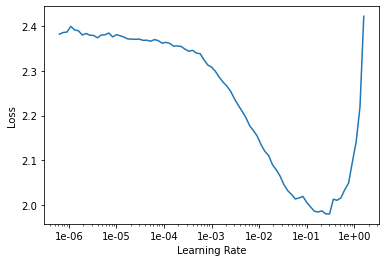

In [62]:
learn.lr_find()
learn.recorder.plot()

In [63]:
learn.fit_one_cycle(2, slice(1e-3,1e-1), moms=(0.8,0.7))
learn.save('first-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.583287,1.274221,0.565806,00:19
1,1.341525,1.104785,0.618696,00:18


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


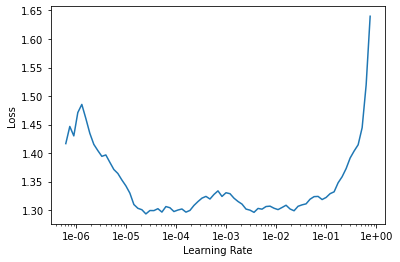

In [64]:
learn.freeze_to(-2)
learn.lr_find()
learn.recorder.plot()

In [65]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, 1e-3/(2.6**4), moms=(0.8,0.7))
learn.save('second-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.279531,1.113228,0.623206,00:21


In [66]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, 5e-3/(2.6**4), moms=(0.8,0.7))
learn.save('third')

epoch,train_loss,valid_loss,accuracy,time
0,1.255479,1.049073,0.643296,00:37


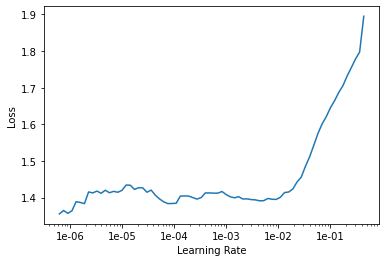

In [68]:
learn.lr_find()
learn.recorder.plot()

In [67]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn.save('fourth-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.122548,0.940022,0.678147,00:50
1,1.064810,0.899276,0.686347,00:44


In [68]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn.save('fifth-large')

epoch,train_loss,valid_loss,accuracy,time
0,0.993825,0.819298,0.720377,00:49
1,0.889897,0.790957,0.724067,00:50


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


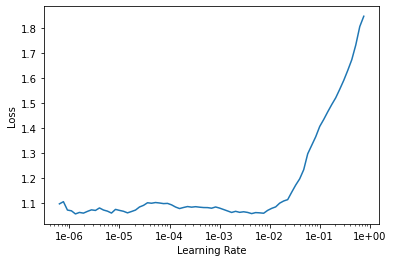

In [73]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [75]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4)), moms=(0.8,0.7))
learn.save('sixth-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.035339,0.924879,0.677054,00:40
1,1.080225,0.917747,0.684608,00:44


In [76]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4)), moms=(0.8,0.7))
learn.save('seventh-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.055498,0.913743,0.688700,00:41
1,1.066321,0.923189,0.680201,00:42


In [77]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-4/(2.6**4)), moms=(0.8,0.7))
learn.save('eighth-large')

epoch,train_loss,valid_loss,accuracy,time
0,1.038458,0.922547,0.683349,00:38
1,1.050278,0.919923,0.684923,00:42


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


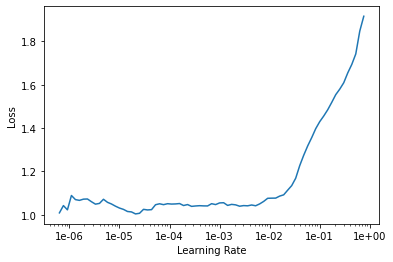

In [78]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

## Model Evaluation

In [69]:
interp = TextClassificationInterpretation.from_learner(learn) 

In [70]:
interp.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
xxbos,realDonaldTrump,JoeBiden,7.17,0.00
xxbos @cnnsotu : xxmaj tomorrow on # xxup cnnsotu w / @jaketapper : @senatorromney and xxunk !,BernieSanders,SenatorRomney,6.81,0.00
xxbos xxmaj it is good news that the xxmaj special xxmaj counsel has concluded that neither the xxmaj president nor his campaign xxunk with the xxmaj russian government . xxmaj it is now time for the country to move forward .,SenKamalaHarris,SenatorRomney,6.10,0.00
xxbos,realDonaldTrump,SenWarren,5.97,0.00
xxbos xxmaj this is pathetic .,SenKamalaHarris,SenTedCruz,5.96,0.00


In [71]:
interp.show_intrinsic_attention("Immigration is the driving force behind America!")

/pytorch/aten/src/ATen/native/cuda/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/cuda/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


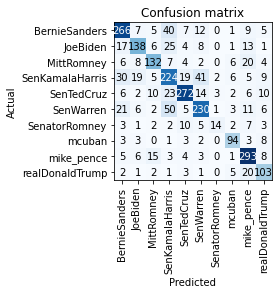

In [72]:
interp.plot_confusion_matrix()

In [88]:
list(learn.model.parameters())

[Parameter containing:
 tensor([[-0.1353,  0.4438, -0.2424,  ..., -0.2903,  1.0681,  1.1670],
         [ 0.1959, -0.0158,  0.0056,  ..., -0.0604,  0.2325, -0.0146],
         [ 0.2755,  0.9498,  1.7809,  ..., -0.3519, -1.6625,  0.3028],
         ...,
         [ 0.2872, -0.0424,  0.0107,  ..., -0.2341,  0.4312, -0.0449],
         [ 0.2872, -0.0424,  0.0107,  ..., -0.2341,  0.4312, -0.0449],
         [ 0.2872, -0.0424,  0.0107,  ..., -0.2341,  0.4312, -0.0449]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([[ 0.0635, -0.0177, -0.0846,  ..., -0.0891, -0.0677, -0.0371],
         [-0.0577, -0.0480,  0.0155,  ...,  0.1863, -0.1118,  0.0776],
         [ 0.2037, -0.0169,  0.2719,  ...,  0.0470,  0.0594,  0.0120],
         ...,
         [-0.1064,  0.1952,  0.0993,  ..., -0.1411,  0.0134, -0.0083],
         [-0.0510, -0.0786,  0.0363,  ..., -0.1817, -0.0127,  0.0603],
         [ 0.0097,  0.0546,  0.0012,  ...,  0.0302,  0.1304,  0.0362]],
        device='cuda:0', re

In [122]:
learn.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [25, 400]            0          False     
______________________________________________________________________
RNNDropout           [25, 1152]           0          False     
______________________________________________________________________
RNNDropout           [25, 1152]           0          False     
______________________________________________________________________
BatchNorm1d          [1200]               2,400      True      
______________________________________________________________________
Dropout              [1200]               0          False     
______________________________________________________________________
Linear               [50]                 60,050     True      
______________________________________________________________________
ReLU                 [50]                 0          False     
________________________________________________

In [96]:
p = np.matrix(list(learn.model.parameters())[-2].cpu().detach().numpy())

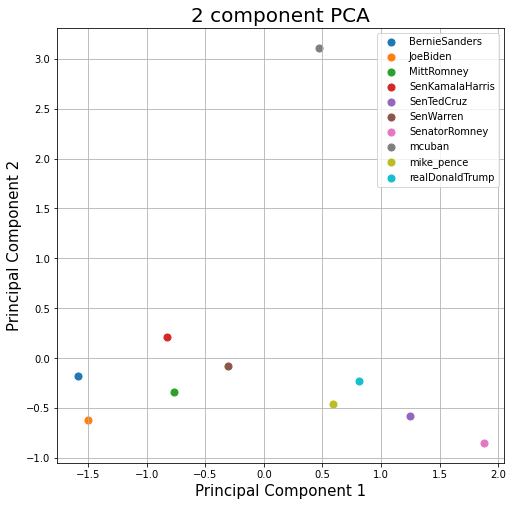

In [121]:
targets = pd.Series(["BernieSanders", "JoeBiden", "MittRomney", "SenKamalaHarris", "SenTedCruz", "SenWarren", "SenatorRomney", "mcuban", "mike_pence", "realDonaldTrump"], name = 'targets')
finalDf = pd.concat([principalDf, targets], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target in targets:
    indicesToKeep = finalDf['targets'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [106]:
principalDf

,principal component 1,principal component 2
0,-1.589650,-0.175766
1,-1.499155,-0.617511
2,-0.766999,-0.339272
3,-0.828203,0.216285
4,1.251137,-0.576669
5,-0.310466,-0.082849
6,1.875615,-0.849427
7,0.468387,3.110376
8,0.590278,-0.458011
9,0.809056,-0.227155


In [117]:
finalDf

,principal component 1,principal component 2,0
0,-1.589650,-0.175766,BernieSanders
1,-1.499155,-0.617511,JoeBiden
2,-0.766999,-0.339272,MittRomney
3,-0.828203,0.216285,SenKamalaHarris
4,1.251137,-0.576669,SenTedCruz
5,-0.310466,-0.082849,SenWarren
6,1.875615,-0.849427,SenatorRomney
7,0.468387,3.110376,mcuban
8,0.590278,-0.458011,mike_pence
9,0.809056,-0.227155,realDonaldTrump


In [80]:
learn.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [25, 400]            0          False     
______________________________________________________________________
RNNDropout           [25, 1152]           0          False     
______________________________________________________________________
RNNDropout           [25, 1152]           0          False     
______________________________________________________________________
BatchNorm1d          [1200]               2,400      True      
______________________________________________________________________
Dropout              [1200]               0          False     
______________________________________________________________________
Linear               [50]                 60,050     True      
______________________________________________________________________
ReLU                 [50]                 0          False     
________________________________________________

In [83]:
learn.model.parameters

<bound method Module.parameters of SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(20624, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(20624, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplac

In [ ]:
################### Further Development for Topic-based data filteration ########################

In [ ]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

def word_basket_in_text(word_list, text):
    status = True
    for word in word_list:
        if type(word)==list:
            list_status = False
            for list_word in word:
                list_status = list_status or word_in_text(list_word, text)
            status = status and list_status
        else: status = status and word_in_text(word, text)
    return status

In [ ]:
# Changing &amp; to 'and'
tweets.text = tweets.text.apply(lambda x: re.sub(u'\&amp\;', u'and', x))

# extracting URLS
tweets['urls'] = tweets.text.apply(lambda x: re.findall('http\S+', x))
tweets['text_clean'] = tweets.text.apply(lambda x: re.sub(u'http\S+', u'', x)) 

# extracting @... 
tweets['mentions'] = tweets.text.apply(lambda x: re.findall(u'@(\w+)', x))

# extracting hashtags
tweets['hashtags'] = tweets.text.apply(lambda x: re.findall(u'#(\w+)', x))
tweets.text_clean = tweets.text_clean.apply(lambda x: re.sub(u'#', u'', x))

# Binary for Re-Tweets
tweets['retweet'] = tweets.text.apply(lambda x: 1 if len(re.findall(u'RT', x))>0 else 0)
tweets.text_clean = tweets.text_clean.apply(lambda x: re.sub(u'RT', u'', x))

In [ ]:
Healthcare = [u'care','affordable care act', u'medicare', u'obamacare',  u'benefits', u'opioid', u'abortion', u'medicaid', u'single payer', u'medication', u'prescription', u'drugs', u'hospital', u'health', u'care']
Terrorism = [u'al', u'terror', u'sanctions', u'drone', u'oil', u'gulf', u'intelligence', u'ISIS', u'military', u'nuclear']
Economy = [u'china', u'tariff', u'mexico', u'fed', u'sec', u'interest', u'rate', u'immigration', u'debt', u'unemployment', u'growth', u'inflation', u'trade war', u'dollar', u'gdp', u'g20', u'recession', u'stock', u'market']
lgbtq = [u'gay', u'lesbian', u'pride', u'community', u'lgbt', u'same-sex', u'marriage', u'orientation', u'parade', u'stonewall', u'riot', u'civil', u'homosexual', u'queer', u'conversion']

china_tariffs = ['china', 'tariff']
safe_abortion = ['abortion', ['safe', 'legal']]
abortion_ban = ['abortion', ['ban', 'restrictions', 'extreme']]
affordable_care = ['health', ['affordable', 'obamacare', 'medicare', 'care']]
medicare = ['MedicareForAll', ['Medicare']] 
greennewdeal = ['greennewdeal']
lgbtq_marriage_equality_act = [['marriage', 'relationship', 'relationships', 'couple', 'couples'], ['gay', 'lesbian', 'pride', 'orientation']]


In [ ]:
# Final List

# Healthcare
affordable_care = ['health', ['affordable', 'obamacare', 'medicare', 'care']]
medicare = ['medicare'] 
safe_abortion = ['abortion', ['safe', 'legal']]
abortion_ban = ['abortion', ['ban', 'restrictions', 'extreme']]

# Education
education_for_all = ['education', ['afford', 'free']]
student_loans = ['student', ['cancel', 'loans', 'debt']]

# Immigration
immigration = ['immigration', ['policy', 'policies', 'mexico', 'illegal', 'undocumented', 'border']]
asylum = ['border', ['detention', 'families', 'family', 'asylum']]

# Guns
Gun_Laws = ['gun', ['semi-automatic', 'assault', 'shooting', 'reform', 'open carry', 'second amendment']]

#Climate
Global_Warming = ['climate', ['global warming', 'emissions', 'pollution', 'accord', 'fossil', 'fuel', 'oil']]
GND = [['net-zero', 'net zero', 'carbon', 'green']]
       


In [ ]:
all_tweets = ''
for tweet in tweets['text']:
    if word_basket_in_text(GND, tweet):
        print('-------')
        tweet = re.sub(u'\&amp\;', u'and', tweet)
        tweet = re.sub(u'http\S+', u'', tweet)
        tweet = re.sub(u'@(\w+)', u'', tweet)   
        tweet = re.sub(u'-', u' ', tweet) 
        print(tweet)
        all_tweets = all_tweets + ' ; ' + tweet

-------
RT : We must take bold action on climate change and create a green economy that benefits all Americans. Thank you to …
-------
RT : In NJ driving on the Turnpike with my State Director  (and his green tie) this morning—heading to a great round tabl…
-------
RT : Bob Menendez is a champion for protecting New Jersey’s beaches, coastal communities and green spaces. Today, Bob joined wi…
-------
RT : Our most vulnerable communities are disproportionately impacted by pollution + hit first and worst by climate change. Learn…
-------
                                                61. Green Latinos  opposes the Senate  health care bill
-------
                                                60. Green For All  opposes the Senate  health care bill


In [ ]:
tknzr = TweetTokenizer()
counts = Counter(tknzr.tokenize(all_tweets))
print(counts)

Counter({'the': 45, 'and': 35, '.': 34, 'our': 26, ',': 25, 'border': 25, 'to': 23, 'of': 22, ';': 21, 'immigration': 20, 'a': 15, 'I': 12, 'at': 8, 'illegal': 8, 'in': 8, 'have': 7, 'that': 7, 'wall': 7, '’': 6, 'as': 6, 'The': 6, ':': 6, 'southern': 6, 'crisis': 6, 'for': 6, 'country': 6, 'an': 5, 'want': 5, 'see': 5, 'is': 5, 'broken': 5, 'system': 5, 'secure': 5, 'people': 5, 'Texans': 4, 'agents': 4, 'human': 4, 'children': 4, 'today': 4, 'by': 4, 'humanitarian': 4, 'we': 4, 'We': 4, 'called': 4, 'building': 4, 'necessary': 4, 'step': 4, 'stopping': 4, 'flow': 4, 'into': 4, 'defending': 4, 'overwhelming': 3, 'majority': 3, 'they': 3, 'secured': 3, 'Border': 3, 'Patrol': 3, 'legal': 3, '#SecureTheBorder': 3, 'has': 3, 'security': 3, 'must': 3, 'need': 3, 'put': 3, 'catch': 3, 'release': 3, 'which': 3, 'on': 3, '>': 3, 'long': 3, 's': 3, 'who': 3, 'American': 3, 'are': 3, 'Texas': 2, 'supported': 2, 'championed': 2, 'traffickers': 2, 'drug': 2, 'produced': 2, 'RT': 2, 'A': 2, 'exist